Linear regression is a great place to start with as an example problem to understand the essentials of machine learning. 

It is a simpliest setting to solve real-world problem when solution for $Ax=b$ does not exist.



Let's go back to the basic, elementary school algebra.

We care about the solution for simple equaiton for linear system of two variables, two equations with two unknowns:

$$ 3x-y=7$$
$$ 2x+3y=1 $$

Rewriting it in matrix algebra:

$$ \begin{bmatrix} 3 & -1 \\ 2  & 3 \end{bmatrix}  \begin{bmatrix} x \\ y \end{bmatrix} =	\begin{bmatrix} 7 \\ 1\end{bmatrix} $$

Is a problem of solving $ Ax=b $ where $A=\begin{bmatrix} 3 & -1 \\ 2  & 3 \end{bmatrix}$ and $b=\begin{bmatrix} 7 \\ 1\end{bmatrix}$.

Is this case, determinant of $A$ exists and $A^{-1} = \begin{bmatrix}
  0.27 & 0.09 \\ 
  -0.18 & 0.27 \\ 
  \end{bmatrix}$


In [13]:
A_inv=solve(matrix(c(3,2,-1,3),nrow = 2))
library(xtable)
print(A_inv)
#print(xtable(A_inv), floating=FALSE, tabular.environment="bmatrix", hline.after=NULL, include.rownames=FALSE, include.colnames=FALSE)

           [,1]       [,2]
[1,]  0.2727273 0.09090909
[2,] -0.1818182 0.27272727


And thus $x=A^{-1}b=\begin{bmatrix} 2\\-1\end{bmatrix}$, as

In [9]:
b=A_inv%*%matrix(c(7,1))
print(b)

     [,1]
[1,]    2
[2,]   -1


Now we think of a situation where the system is not solvable, such as there are more eqautions than unknowns (or $det(A)=0$ case!). 

Example from pp 162 (Strang, 2006).

$$ 1x_{1}+ 2x_{2}=b_{1} $$
$$ 1x_{1}+3x_{2}=b_{2} $$
$$ 0x_{1}+0x_{2}=b_{3} $$


There is no direct solution to this problem. And this is what any other real-world problems mostly look like. 
Column space of $A$ is a two-dimensional plane within the three-dimensional space. 
Column space is spanned by two vectors $(1,1,0)$ and $(2,3,0)$, therefore $Ax$ for any x is resultedly a vector within $Col(A)$. For example, for $x=(x_{1},x_{2})$, $Ax= [1x_{1}+ 2x_{2},1x_{1}+3x_{2},0x_{1}+0x_{2}] $.

Taking partial derivative to minimize equared error term gives 

$$ 2A^{T}Ax-2A^{T}b=0 $$ 

Which is the same as finding vector perpendicaular to the column space, error vector being $ e =b-A\hat{x}$


Thus $$ A^{T}(b-A\hat{x})=0 $$

$$ A^{T}A\hat{x}=A^{T}b $$

$$ \label{eq1} \hat{x}=(A^{T}A)^{-1}A^{T}b ......................................................(1) $$ 

Which could be represented in the figure below: 
<img src="Plot1_210621_170300.jpg" width=300 height=300 />

The projection matrics is 
$$ P=A(A^{T}A)^{-1}A^{T}$$

In statistics, we think of a situation where $b=Ax+\varepsilon $ where x are $\beta $ which is regression coefficient. Re-writing in regression term: $$y=X\beta+\varepsilon$$. $$\varepsilon \sim N(0,\sigma)$$
Note that $x$ in linear algebra became $\beta$ and matrix $A$ became $X$. 
Now, since $$y-X\beta \sim N(0,\sigma)$$
We can express the likelihood of our data given the wieghts $\beta$, thus writing it as function of $\beta$

$$P(X,y|\beta) \propto L(\beta)$$
Where the pdf of $\varepsilon$ is 
$$ \propto Exp[-1/2(y-X\beta)^{T}1/\sigma I (y-X\beta)] $$
Therefore, minima of log likelihood is
$$ \frac{\partial}{\partial \beta}log L(\beta) \propto (y-X\beta)^{T}(y-X\beta)=0 $$
$$ \frac{\partial}{\partial \beta} (y-X\beta)^{T}(y-X\beta) $$
Through product rule
$$ = -(y-X\beta)^{T}X-(y-X\beta)^{T}X$$
$$ = -2 (y-X\beta)^{T}X $$
$$ = -2 (y^{T}-\beta^{T}X^{T})X $$
$$ \propto (y^{T}-\beta^{T}X^{T})X =0. $$
Therefore, 
$$\beta^{T}X^{T}X=y^{T}X $$
$$ \beta^{T}=y^{T}X(X^{T}X)^{-1} $$
Then,
$$ \beta=(y^{T}X(X^{T}X)^{-1})^{T} $$
$$ \beta=(X(X^{T}X)^{-1})^{T}y $$
$$ \beta=((X^{T}X)^{-1})^{T}X^{T}y $$
Since $(X^{T}X)^{-1}={(X^{T}X)^{-1}}^{T} $,
$$ \beta=(X^{T}X)^{-1}X^{T}y.......................................(2) $$

IS THIS SIMILAR?

$ (2) $ $\beta=(X^{T}X)^{-1}X^{T}y. $ in statistics is actually the same as $ (1) $ $  \hat x=(A^{T}A)^{-1}A^{T}b$ in linear algebra. 


How did this happen?


We used squared error term for cost funciton (loss function). 

### Example

Imagine a case where $\{(x,y)\}=\{{(1.00,8.42), 
  (2.00,9.07), 
  (3.00,9.90) ,
  (4.00,-9.94),
  (5.00,0.22) ,
  (6.00,6.80), 
  (7.00,7.18) ,
  (8.00,22.03) ,
  (9.00,11.41) ,
  (10.00,11.21)\}}$
  $Ax=b$ become

$A=\begin{bmatrix}
  1.00 & 1.00 \\ 
  1.00 & 2.00 \\ 
  1.00 & 3.00 \\ 
  1.00 & 4.00 \\ 
  1.00 & 5.00 \\ 
  1.00 & 6.00 \\ 
  1.00 & 7.00 \\ 
  1.00 & 8.00 \\ 
  1.00 & 9.00 \\ 
  1.00 & 10.00 \\ 
  \end{bmatrix}$, $b=\begin{bmatrix}
  8.42 \\ 
  9.07 \\ 
  9.90 \\ 
  -9.94 \\ 
  0.22 \\ 
  6.80 \\ 
  7.18 \\ 
  22.03 \\ 
  11.41 \\ 
  11.21 \\ 
  \end{bmatrix}$

$$
\begin{bmatrix}
  1.00 & 1.00 & 1.00 & 1.00 & 1.00 & 1.00 & 1.00 & 1.00 & 1.00 & 1.00 \\ 
  1.00 & 2.00 & 3.00 & 4.00 & 5.00 & 6.00 & 7.00 & 8.00 & 9.00 & 10.00 \\ 
  \end{bmatrix}\cdot
\begin{bmatrix}
  1.00 & 1.00 \\ 
  1.00 & 2.00 \\ 
  1.00 & 3.00 \\ 
  1.00 & 4.00 \\ 
  1.00 & 5.00 \\ 
  1.00 & 6.00 \\ 
  1.00 & 7.00 \\ 
  1.00 & 8.00 \\ 
  1.00 & 9.00 \\ 
  1.00 & 10.00 \\ 
  \end{bmatrix}
  $$

Lets think of another data with two different fucntions for different intervals. 

For example, $y=f(x)$ follows 
$y=1/2x$, when $x\in(-\infty,10]$ and $y=(x-10)^2+5=x^2-20x+105$, when $x\in(10,\infty)$. With natrual noise the graph would look as below:

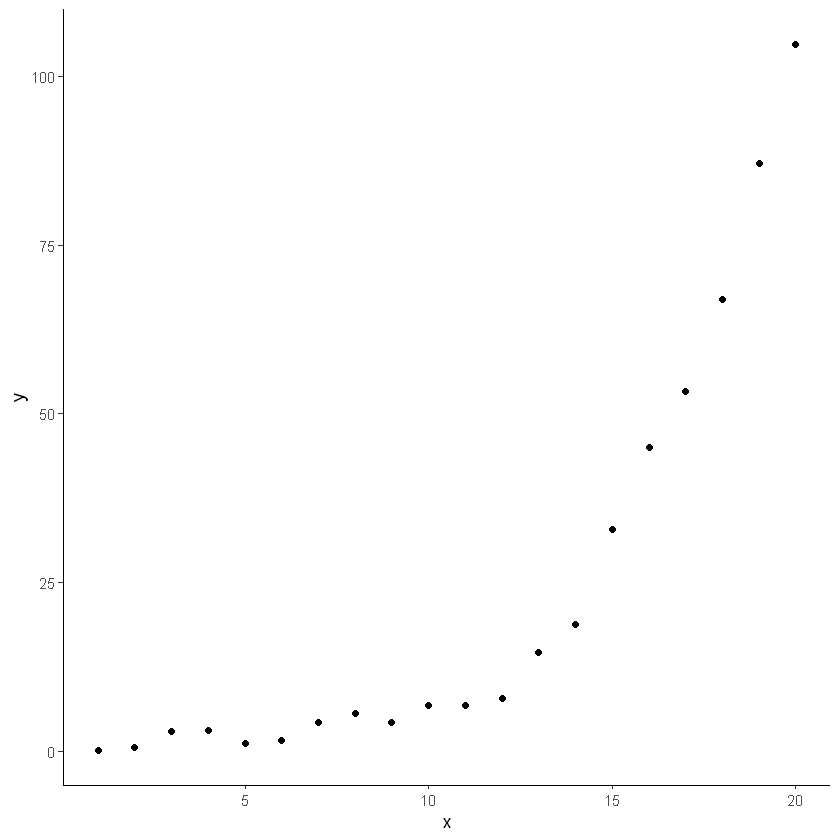

In [58]:
library(ggplot2)
library(xtable)
set.seed(1)
u=seq(1:20)
w=c(.5*u[1:10]+rnorm(10,0,2),(u[11:20]-10)^2+5+rnorm(10,0,2))
qplot(u,c(.5*u[1:10]+rnorm(10,0,2),(u[11:20]-10)^2+5+rnorm(10,0,2)))+theme_classic()+ylab("y")+xlab("x")
A=as.matrix(
    data.frame(c(rep(1,10),rep(0,10)),
                       c(u[1:10],rep(0,10)),
                       c(rep(0,10),rep(1,10)),
                       c(rep(0,10),u[11:20]),
                       c(rep(0,10),u[11:20]^2)
                      )
           )
#print(xtable(as.matrix(w)), floating=FALSE, tabular.environment="bmatrix", hline.after=NULL, include.rownames=FALSE, include.colnames=FALSE)
#print(xtable(A), floating=FALSE, tabular.environment="bmatrix", hline.after=NULL, include.rownames=FALSE, include.colnames=FALSE)

We will be modeling this data again with least square method, by defining here with different bases for different intervals. Given matrix will be:
$ A=X=\begin{bmatrix}
  1.00 & 1.00 & 0.00 & 0.00 & 0.00 \\ 
  1.00 & 2.00 & 0.00 & 0.00 & 0.00 \\ 
  1.00 & 3.00 & 0.00 & 0.00 & 0.00 \\ 
  1.00 & 4.00 & 0.00 & 0.00 & 0.00 \\ 
  1.00 & 5.00 & 0.00 & 0.00 & 0.00 \\ 
  1.00 & 6.00 & 0.00 & 0.00 & 0.00 \\ 
  1.00 & 7.00 & 0.00 & 0.00 & 0.00 \\ 
  1.00 & 8.00 & 0.00 & 0.00 & 0.00 \\ 
  1.00 & 9.00 & 0.00 & 0.00 & 0.00 \\ 
  1.00 & 10.00 & 0.00 & 0.00 & 0.00 \\ 
  0.00 & 0.00 & 1.00 & 11.00 & 121.00 \\ 
  0.00 & 0.00 & 1.00 & 12.00 & 144.00 \\ 
  0.00 & 0.00 & 1.00 & 13.00 & 169.00 \\ 
  0.00 & 0.00 & 1.00 & 14.00 & 196.00 \\ 
  0.00 & 0.00 & 1.00 & 15.00 & 225.00 \\ 
  0.00 & 0.00 & 1.00 & 16.00 & 256.00 \\ 
  0.00 & 0.00 & 1.00 & 17.00 & 289.00 \\ 
  0.00 & 0.00 & 1.00 & 18.00 & 324.00 \\ 
  0.00 & 0.00 & 1.00 & 19.00 & 361.00 \\ 
  0.00 & 0.00 & 1.00 & 20.00 & 400.00 \\ 
  \end{bmatrix}
  $
  , and 
  $b=y=\begin{bmatrix}
  -0.75 \\ 
  1.37 \\ 
  -0.17 \\ 
  5.19 \\ 
  3.16 \\ 
  1.36 \\ 
  4.47 \\ 
  5.48 \\ 
  5.65 \\ 
  4.39 \\ 
  9.02 \\ 
  9.78 \\ 
  12.76 \\ 
  16.57 \\ 
  32.25 \\ 
  40.91 \\ 
  53.97 \\ 
  70.89 \\ 
  87.64 \\ 
  106.19 \\ 
  \end{bmatrix}
  $.
  
  Now solving for $\beta=\hat x=(A^{T}A)^{-1}A^{T}b $ gives us $\beta=\begin{bmatrix}
  -0.34 \\ 
  0.61 \\ 
  134.06 \\ 
  -23.92 \\ 
  1.13 \\ 
  \end{bmatrix} $, which gives us $y=0.61x-0.34$ and $ y=1.13x^2+-23.92+134.06 $ for $x$ ranges.

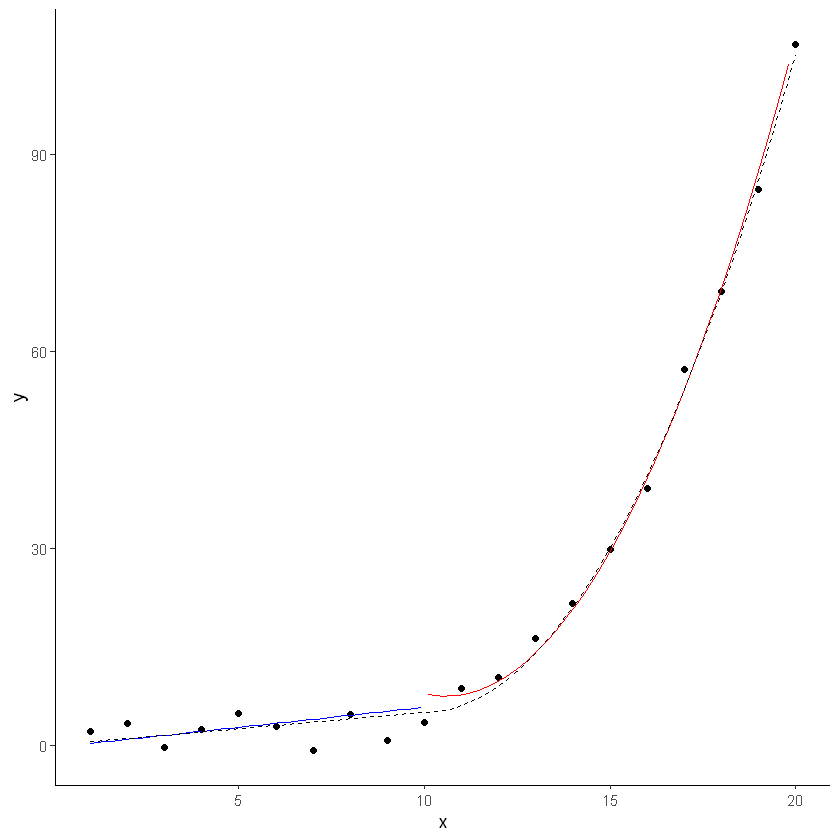

In [80]:
#print(xtable(solve(t(A)%*%A)%*%t(A)%*%w), floating=FALSE, tabular.environment="bmatrix", hline.after=NULL, include.rownames=FALSE, include.colnames=FALSE)
options(warn=-1)
f1<- function(x) ifelse(0<x & x<=10,0.61*x-0.34,NA)
f2<- function(x) ifelse(10<=x& x<20,1.13*x^2-23.92*x+134.06,NA)
orig_f1<-function(x) ifelse(0<x & x<=10,0.5*x,(x-10)^2+5)
library(dplyr)
data.frame(x=u,y=c(.5*u[1:10]+rnorm(10,0,2),(u[11:20]-10)^2+5+rnorm(10,0,2)))%>%
ggplot(aes(x,y))+geom_point()+
theme_classic()+ylab("y")+xlab("x")+
stat_function(fun=f1,colour="blue")+
stat_function(fun=f2,colour="red")+
stat_function(fun=orig_f1,colour="black",linetype="dashed")


Above plot shows original function (black dashed line), along with the functions modeled by least squared methods (blue and red).